In [2]:
#Simulations
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from tqdm import tqdm
from utils import generate_dataset, geometric_graph, plot_geometric_graph, EMV, EMV_mistakes
import matplotlib.patches as mpatches

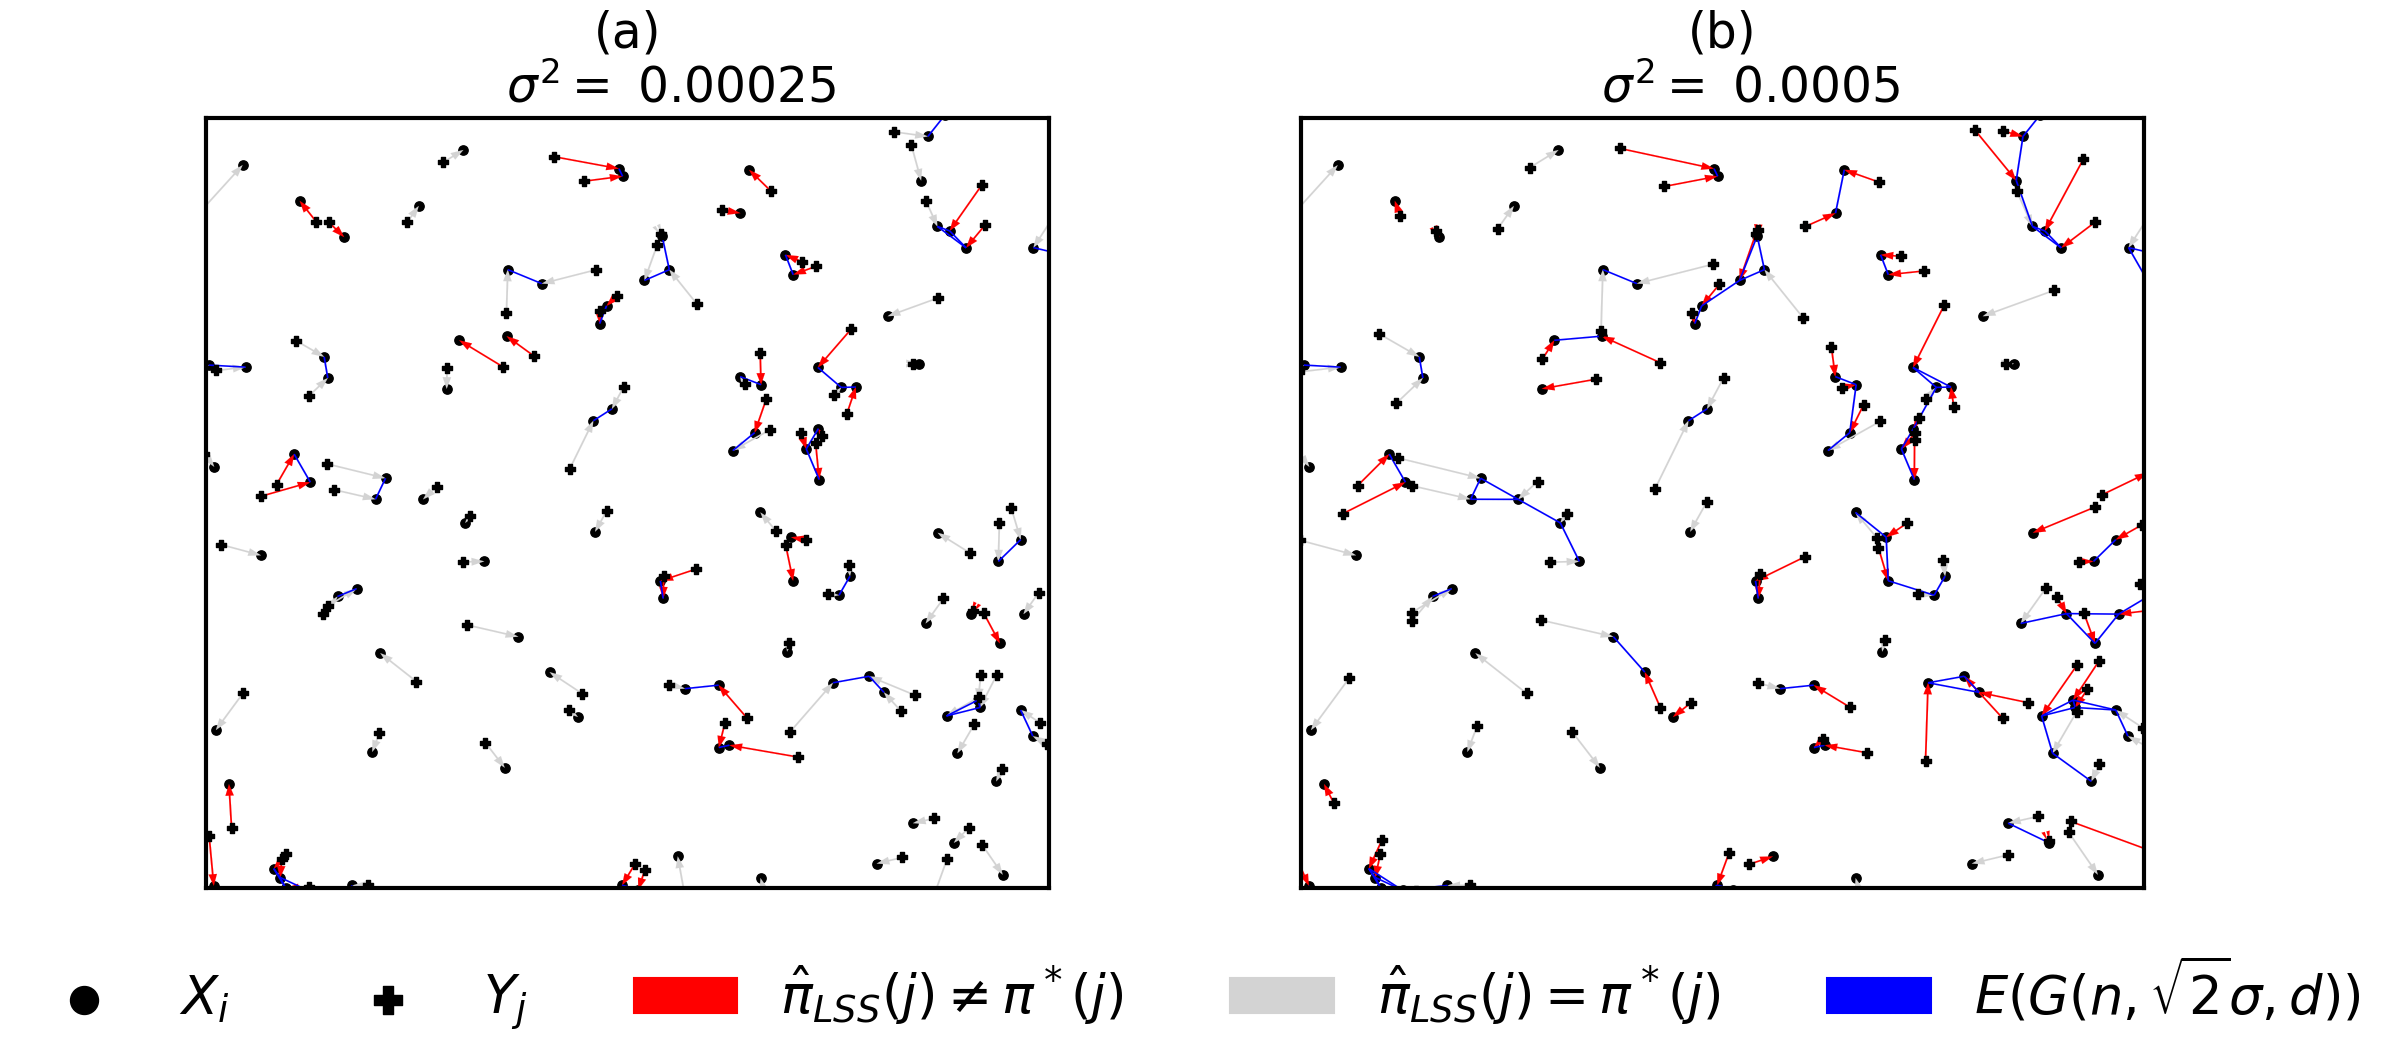

In [4]:
n_plot_rows = 1
n_plot_cols = 2

n = 3000

sigma2 = [0.00025,0.0005]

title = ["(a)","(b)"]

d = 2
noise_dist = "Gaussian"

xb_size = 0.25
yb_size = 0.25

x_center = -0.25
y_center = 0.48

x_min = x_center-xb_size
x_max = x_center+xb_size
y_min = y_center-yb_size
y_max = y_center+yb_size

p_size = 45
l_size = 0.075
h_w = 0.005

seed = 40

fig, axs = plt.subplots(n_plot_rows,n_plot_cols,figsize=(25,10))

for i in range(0,n_plot_cols):
    #x,y = generate_dataset_gaussian(n,d,sigma2,seed=10)
    x,y = generate_dataset(n,d,sigma2[i],seed=seed, noise_dist=noise_dist)
    pi = EMV(x,y)
    mistakes, n_mistakes = EMV_mistakes(pi)
    hits = [i for i in range(0,n) if i not in mistakes]

    axs[i].scatter(x[:,0],x[:,1], c="black", s=p_size, label=r"$X_i$")

    for k in range(0,n):
        if pi[k] != k:
            axs[i].arrow(y[pi[k],0],y[pi[k],1],-y[pi[k],0]+x[k,0],-y[pi[k],1]+x[k,1], linestyle = "-", lw = l_size, head_width=h_w, length_includes_head=True, color =  "red")
        else:
            axs[i].arrow(y[pi[k],0],y[pi[k],1],-y[pi[k],0]+x[k,0],-y[pi[k],1]+x[k,1], linestyle = "-", lw = l_size, head_width=h_w, length_includes_head=True, color =  "lightgray", alpha=1)

    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

    r = np.sqrt(2)*np.sqrt(sigma2[i])

    G = geometric_graph(x,r=r)
    plot_geometric_graph(G,x,axs=axs[i],lw=l_size)

    axs[i].scatter(y[:,0],y[:,1], c="black", s=p_size, label=r"$Y_j$", marker='P')
    
    axs[i].arrow([],[],[],[], linestyle = "-", lw = l_size, head_width=h_w, length_includes_head=True, color = "red", label=r"$\hat{\pi}_{LSS}(j) \neq \pi^*(j)$")
    axs[i].arrow([],[],[],[], linestyle = "-", lw = l_size, head_width=h_w, length_includes_head=True, color = "lightgray", label=r"$\hat{\pi}_{LSS}(j) = \pi^*(j)$")
    axs[i].arrow([],[],[],[], head_length = 0.0, head_width = 0.0, lw=l_size, color='blue', linestyle="--", label=r"$E(G(n,\sqrt{2}\sigma,d))$")

    axs[i].set_xlim((x_min,x_max))
    axs[i].set_ylim((y_min,y_max))
    axs[i].set_title(title[i], y = y_max+0.35, fontsize=35)
    axs[i].text(s=r"$\sigma^2=$ " +f"{sigma2[i]}", x=x_center-0.072 , y = y_max+0.01, fontsize=35)

    plt.setp(axs[i].spines.values(), linewidth=3) 

plt.legend(loc="lower center", bbox_to_anchor=(-0.125, -0.25), ncols=5, fontsize=38, frameon=False, markerscale=3)

plt.subplots_adjust(wspace=0.3, hspace=0)

plt.savefig(f"simulation-{np.round(sigma2,6)}-{n}_single_dist_{noise_dist}_r={np.round(r,6)}_seed={seed}_b_size={xb_size}_x_center={x_center}_y_center={y_center}.pdf",dpi=300, bbox_inches='tight')